# Solar Power Generation Data Analysis

##### Analyst: Kaival Panchal

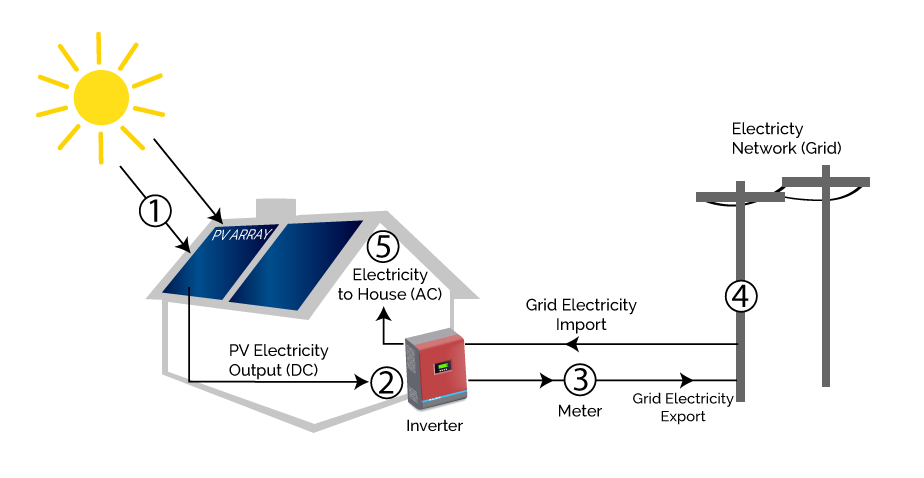

This data has been gathered at two solar power plants in India over a 34 day period. It has two pairs of files - each pair has one power generation dataset and one sensor readings dataset. The power generation datasets are gathered at the inverter level - each inverter has multiple lines of solar panels attached to it. The sensor data is gathered at a plant level - single array of sensors optimally placed at the plant.

There are a few areas of concern at the solar power plant -
1.  Is there any missing data and are all the data types correct?
2.	How many inverters (source_key) are there for each plant?
3.	Rank the inverters (source_key) based on the DC/AC power they produce
4.	Which inverter (source_key) has produced maximum DC/AC power?
5.	What is the maximum/minimum amount of DC/AC Power generated in a time interval/day?
6.	What is the mean value of daily yield?
7.	What is the total irradiation per day?
8.	What is the max ambient and module temperature?
2.	Can we identify the need for panel cleaning/maintenance?
3.	Can we identify faulty or suboptimally performing equipment?




In [1]:
# Importing important libraries for data analysis. 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Load the data as a Pandas Dataframe. 
P1 = pd.read_csv("Plant_1_Generation_Data.csv")
WDP1= pd.read_csv('Plant_1_Weather_Sensor_Data.csv')
P2 = pd.read_csv("Plant_2_Generation_Data.csv")
WDP2= pd.read_csv('Plant_2_Weather_Sensor_Data.csv')


## Data Pre-Processing/Cleaning

### Question 1. Is there any missing data and are all the data types correct?

In [3]:
#Analyse data sets for features, null values, and datatypes
print(len(P1))
P1.info()

68778
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68778 entries, 0 to 68777
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE_TIME    68778 non-null  object 
 1   PLANT_ID     68778 non-null  int64  
 2   SOURCE_KEY   68778 non-null  object 
 3   DC_POWER     68778 non-null  float64
 4   AC_POWER     68778 non-null  float64
 5   DAILY_YIELD  68778 non-null  float64
 6   TOTAL_YIELD  68778 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 3.7+ MB


In [4]:
print(len(WDP1))
WDP1.info()

3182
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DATE_TIME            3182 non-null   object 
 1   PLANT_ID             3182 non-null   int64  
 2   SOURCE_KEY           3182 non-null   object 
 3   AMBIENT_TEMPERATURE  3182 non-null   float64
 4   MODULE_TEMPERATURE   3182 non-null   float64
 5   IRRADIATION          3182 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 149.3+ KB


In [5]:
print(len(P2))
P2.info()

67698
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67698 entries, 0 to 67697
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE_TIME    67698 non-null  object 
 1   PLANT_ID     67698 non-null  int64  
 2   SOURCE_KEY   67698 non-null  object 
 3   DC_POWER     67698 non-null  float64
 4   AC_POWER     67698 non-null  float64
 5   DAILY_YIELD  67698 non-null  float64
 6   TOTAL_YIELD  67698 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 3.6+ MB


In [6]:
print(len(WDP2))
WDP2.info()

3259
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3259 entries, 0 to 3258
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DATE_TIME            3259 non-null   object 
 1   PLANT_ID             3259 non-null   int64  
 2   SOURCE_KEY           3259 non-null   object 
 3   AMBIENT_TEMPERATURE  3259 non-null   float64
 4   MODULE_TEMPERATURE   3259 non-null   float64
 5   IRRADIATION          3259 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 152.9+ KB


###  After comparison of the length of the data frame compared to the non- null count , there are no empty data values and all data types are correct. 


### Question 2. How many inverters are there for each plant?
 Source_Key provides the ID number for each inverter.
 Logic: Find the unique inverter by its Id number and sum up total count of inverters. 

In [7]:
# find unique inverters by id #
INP1 = np.unique(P1['SOURCE_KEY'])
INP2 = np.unique(P2['SOURCE_KEY'])
print('The number of inverters in Plant 1 is ' + str(len(INP1)))
print('The number of inverters in Plant 2 is ' + str(len(INP2)))


The number of inverters in Plant 1 is 22
The number of inverters in Plant 2 is 22


### The number of inverters in Plant 1 and 2 is 22

### Question 3. Rank the inverters based on the DC/AC power they produce for each plant.
### Question 4. Which inverter (source_key) has produced maximum DC/AC power?
Logic: Groupby each unique inverter and sum up total DC and AC power then sort from maximum to minimum. Plot.  

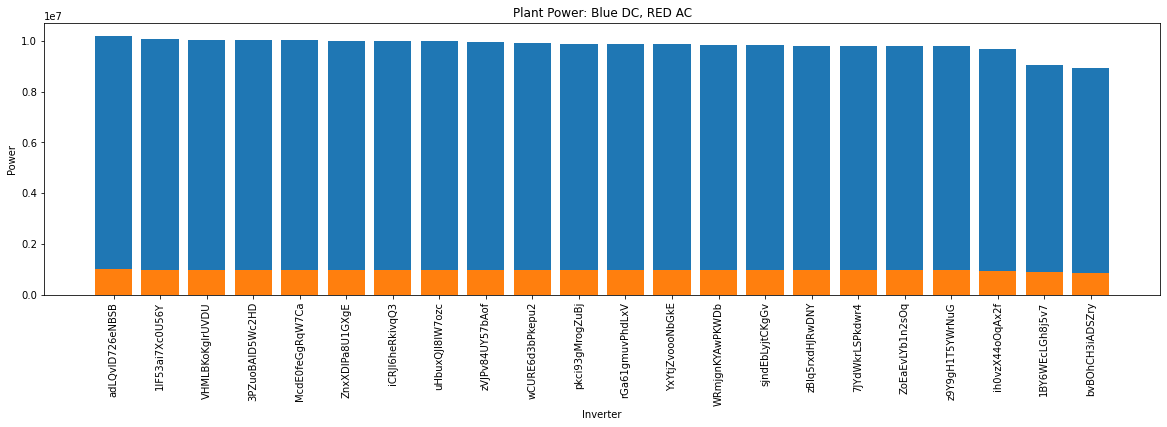

Figure 1: Plant 1 Power vs Inverter


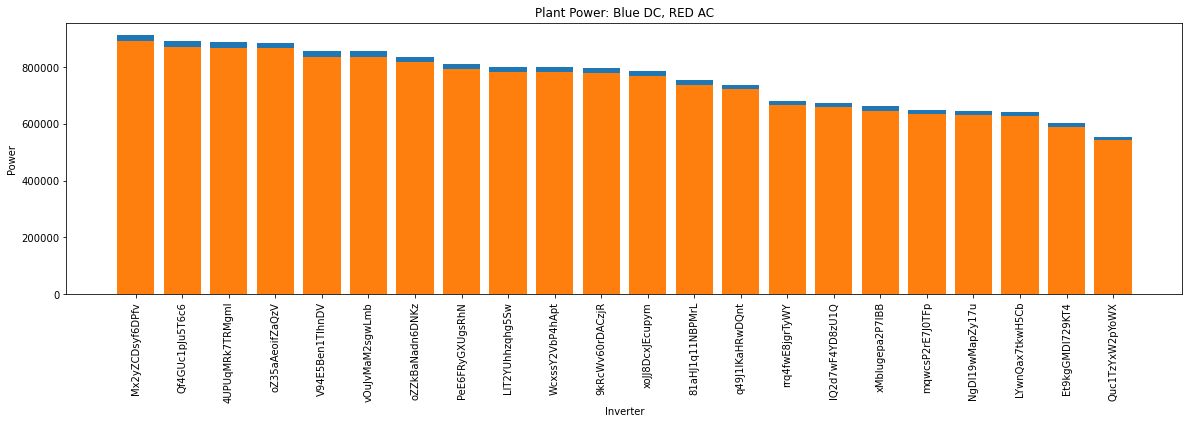

Figure 2: Plant 2 Power vs Inverter


In [8]:
INP1_Total= P1.groupby('SOURCE_KEY').sum()
INP2_Total= P2.groupby('SOURCE_KEY').sum()
DCINP1 = INP1_Total["DC_POWER"].sort_values(ascending = False)
ACINP1 = INP1_Total["AC_POWER"].sort_values(ascending = False)
DCINP2 = INP2_Total["DC_POWER"].sort_values(ascending = False)
ACINP2 = INP2_Total["AC_POWER"].sort_values(ascending = False)

plt.figure(figsize=(20,5))
plt.bar(*zip(*DCINP1.items()))
plt.bar(*zip(*ACINP1.items()))
plt.xticks(rotation = 90)
plt.xlabel('Inverter')
plt.ylabel('Power')
plt.title('Plant Power: Blue DC, RED AC')
plt.show()

print("Figure 1: Plant 1 Power vs Inverter")

plt.figure(figsize=(20,5))
plt.bar(*zip(*DCINP2.items()))
plt.bar(*zip(*ACINP2.items()))
plt.xticks(rotation = 90)
plt.xlabel('Inverter')
plt.ylabel('Power')
plt.title('Plant Power: Blue DC, RED AC')
plt.show()
print("Figure 2: Plant 2 Power vs Inverter")


### Plant 1 Inverter adLQvlD726eNBSB  produced the max power 

### Plant 2 Inverter Mx2yZCDsyf6DPfv produced the max power 

### Question 5. What is the maximum/minimum amount of DC/AC Power generated in a time interval/day?
   ##### Which Month was the best?
   ##### What was the maximim power generation per day on average and what time did it occur?
   ##### Which day in May and June were the best?

In [9]:
#interval Decison:
#max/min by months
#Plant 1
P1["DATE"] = P1['DATE_TIME'].astype(str)
P1["Month"]= P1["DATE_TIME"].str[3:5]
MonthsP1 = np.unique(P1['Month'])
StatMonthP1 = P1.groupby('Month').sum()
print("Plant 1")
print(StatMonthP1['DC_POWER'])
print(StatMonthP1['AC_POWER'])

#Plant2
P2["DATE"] = P2['DATE_TIME'].astype(str)
P2["Month"]= P2["DATE_TIME"].str[5:7]
MonthsP2 = np.unique(P2['Month'])
StatMonthP2 = P2.groupby('Month').sum()
print("Plant 2")
print(StatMonthP2['DC_POWER'])
print(StatMonthP2['AC_POWER'])

Plant 1
Month
05    1.094260e+08
06    1.070477e+08
Name: DC_POWER, dtype: float64
Month
05    1.069973e+07
06    1.047033e+07
Name: AC_POWER, dtype: float64
Plant 2
Month
05    8.861584e+06
06    7.839645e+06
Name: DC_POWER, dtype: float64
Month
05    8.663674e+06
06    7.670352e+06
Name: AC_POWER, dtype: float64


### In both plants the best month was May as compared to June

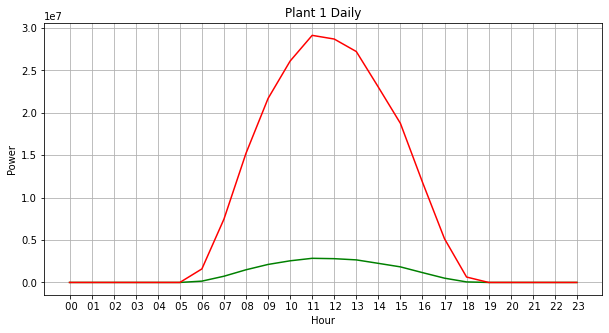

Figure 3: Plant 1 Power over a 24 hour Period
In Plant 1 the maximum AC power level of 2844334.275112902 Watts Was acheived at the 11th Hour of the Day
In Plant 1 the maximum DC power level of 29122530.792827062 Watts Was acheived at the 11th Hour of the Day


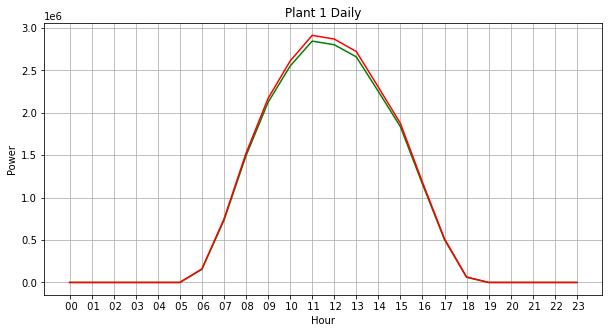

Figure 3: Plant 1 Power over a 24 hour Period after Fixing DC
In Plant 1 the maximum AC power level of 2844334.275112902 Watts Was acheived at the 11th Hour of the Day
In Plant 1 the maximum DC power level of 2912253.079282706 Watts Was acheived at the 11th Hour of the Day


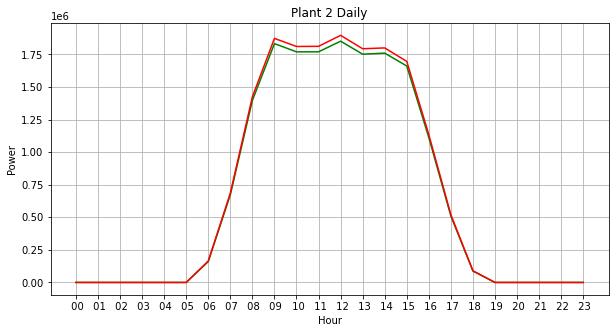

Figure 4: Plant 2 Power over a 24 hour Period
In Plant 2 the maximum AC power level of 1851564.9916849849 Watts Was acheived at the 12th Hour of the Day
In Plant 2 the maximum DC power level of 1896290.1827106208 Watts Was acheived at the 12th Hour of the Day


In [10]:
# Lets see how each plant did in each day over a 24 hour period. 

#Plant 1 
P1['Hour'] =P1["DATE_TIME"].str[10:13]
x = [Hour for Hour, P1 in P1.groupby('Hour')]
StatHourP1 = P1.groupby('Hour').sum()
y1 = StatHourP1['AC_POWER']
y2 = StatHourP1['DC_POWER']
plt.figure(figsize=(10,5))
plt.plot(x,y1,'g')
plt.plot(x,y2,'r')
plt.xlabel("Hour")
plt.ylabel('Power')
plt.title('Plant 1 Daily')
plt.xticks(x)
plt.grid()
plt.show()
print('Figure 3: Plant 1 Power over a 24 hour Period')
print("In Plant 1 the maximum AC power level of " + str(y1.max()) + " Watts Was acheived at the " + str(y1.argmax()) + "th Hour of the Day")
print("In Plant 1 the maximum DC power level of " + str(y2.max()) + " Watts Was acheived at the " + str(y2.argmax()) + "th Hour of the Day")

#Plant 1 -fixed
P1['Hour'] =P1["DATE_TIME"].str[10:13]
x = [Hour for Hour, P1 in P1.groupby('Hour')]
StatHourP1 = P1.groupby('Hour').sum()
y1 = StatHourP1['AC_POWER']
y2 = StatHourP1['DC_POWER']/10
plt.figure(figsize=(10,5))
plt.plot(x,y1,'g')
plt.plot(x,y2,'r')
plt.xlabel("Hour")
plt.ylabel('Power')
plt.title('Plant 1 Daily')
plt.xticks(x)
plt.grid()
plt.show()
print('Figure 3: Plant 1 Power over a 24 hour Period after Fixing DC')
print("In Plant 1 the maximum AC power level of " + str(y1.max()) + " Watts Was acheived at the " + str(y1.argmax()) + "th Hour of the Day")
print("In Plant 1 the maximum DC power level of " + str(y2.max()) + " Watts Was acheived at the " + str(y2.argmax()) + "th Hour of the Day")


#Plant 2
P2['Hour'] =P2["DATE_TIME"].str[10:13]
x = [Hour for Hour, P2 in P2.groupby('Hour')]
StatHourP2 = P2.groupby('Hour').sum()
y12 = StatHourP2['AC_POWER']
y22 = StatHourP2['DC_POWER']
plt.figure(figsize=(10,5))
plt.plot(x,y12,'g')
plt.plot(x,y22,'r')
plt.xlabel("Hour")
plt.ylabel('Power')
plt.title('Plant 2 Daily')
plt.xticks(x)
plt.grid()
plt.show()
print('Figure 4: Plant 2 Power over a 24 hour Period')
print("In Plant 2 the maximum AC power level of " + str(y12.max()) + " Watts Was acheived at the " + str(y12.argmax()) + "th Hour of the Day")
print("In Plant 2 the maximum DC power level of " + str(y22.max()) + " Watts Was acheived at the " + str(y22.argmax()) + "th Hour of the Day")

### In Plant 1 the maximum AC power level of 2844334.27 Watts Was acheived at the 11th Hour of the Day
### In Plant 1 the maximum DC power level of 2912253.79 Watts Was acheived at the 11th Hour of the Day
### In Plant 2 the maximum AC power level of 1851564.99 Watts Was acheived at the 12th Hour of the Day
### In Plant 2 the maximum DC power level of 1896290.18 Watts Was acheived at the 12th Hour of the Day

##### Which day in May and June were the best?###

In [11]:
P2

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,DATE,Month,Hour
0,2020-05-15 00:00:00,4136001,4UPUqMRk7TRMgml,0.0,0.0,9425.000000,2.429011e+06,2020-05-15 00:00:00,05,00
1,2020-05-15 00:00:00,4136001,81aHJ1q11NBPMrL,0.0,0.0,0.000000,1.215279e+09,2020-05-15 00:00:00,05,00
2,2020-05-15 00:00:00,4136001,9kRcWv60rDACzjR,0.0,0.0,3075.333333,2.247720e+09,2020-05-15 00:00:00,05,00
3,2020-05-15 00:00:00,4136001,Et9kgGMDl729KT4,0.0,0.0,269.933333,1.704250e+06,2020-05-15 00:00:00,05,00
4,2020-05-15 00:00:00,4136001,IQ2d7wF4YD8zU1Q,0.0,0.0,3177.000000,1.994153e+07,2020-05-15 00:00:00,05,00
...,...,...,...,...,...,...,...,...,...,...
67693,2020-06-17 23:45:00,4136001,q49J1IKaHRwDQnt,0.0,0.0,4157.000000,5.207580e+05,2020-06-17 23:45:00,06,23
67694,2020-06-17 23:45:00,4136001,rrq4fwE8jgrTyWY,0.0,0.0,3931.000000,1.211314e+08,2020-06-17 23:45:00,06,23
67695,2020-06-17 23:45:00,4136001,vOuJvMaM2sgwLmb,0.0,0.0,4322.000000,2.427691e+06,2020-06-17 23:45:00,06,23
67696,2020-06-17 23:45:00,4136001,xMbIugepa2P7lBB,0.0,0.0,4218.000000,1.068964e+08,2020-06-17 23:45:00,06,23


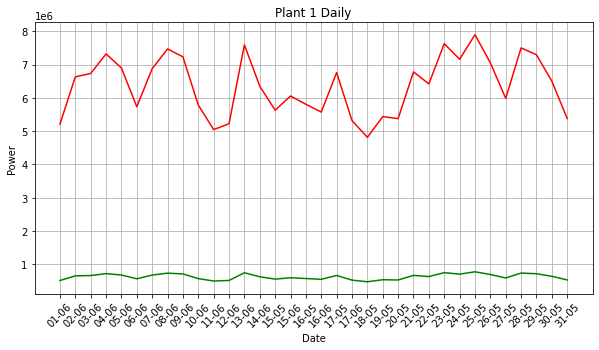

Figure 5: Plant 1 Power vs Date


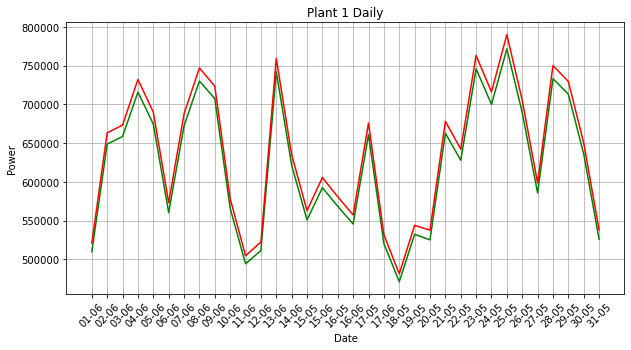

Figure 5: Plant 1 Power vs Date after fixing DC


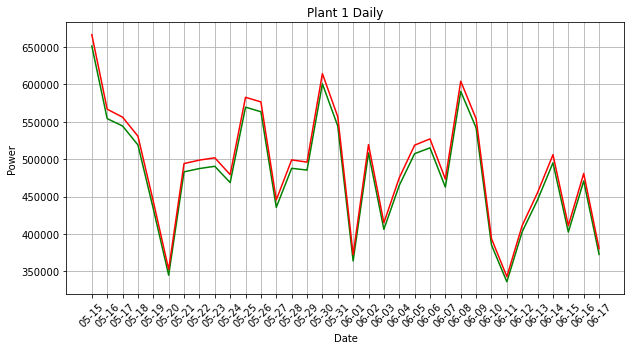

Figure 6: Plant 2 Power vs Date


In [12]:
# Lets see how each plant did in each day over a Month

#Plant 1 
P1['Date'] =P1["DATE_TIME"].str[0:5]
x = [Date for Date, P1 in P1.groupby('Date')]
StatHourP1 = P1.groupby('Date').sum()
y1 = StatHourP1['AC_POWER']
y2 = StatHourP1['DC_POWER']
plt.figure(figsize=(10,5))
plt.plot(x,y1,'g')
plt.plot(x,y2,'r')
plt.xlabel("Date")
plt.ylabel('Power')
plt.title('Plant 1 Daily')
plt.xticks(x, rotation = 45)
plt.grid()
plt.show()
print('Figure 5: Plant 1 Power vs Date')

#Plant 1 -Fixed
P1['Date'] =P1["DATE_TIME"].str[0:5]
x = [Date for Date, P1 in P1.groupby('Date')]
StatHourP1 = P1.groupby('Date').sum()
y1 = StatHourP1['AC_POWER']
y2 = StatHourP1['DC_POWER']/10
plt.figure(figsize=(10,5))
plt.plot(x,y1,'g')
plt.plot(x,y2,'r')
plt.xlabel("Date")
plt.ylabel('Power')
plt.title('Plant 1 Daily')
plt.xticks(x, rotation = 45)
plt.grid()
plt.show()
print('Figure 5: Plant 1 Power vs Date after fixing DC')


#05/25 was the best day in Plant 1

#Plant 2 
P2['Date'] =P2["DATE_TIME"].str[5:10]
x = [Date for Date, P2 in P2.groupby('Date')]
StatHourP2 = P2.groupby('Date').sum()
y1 = StatHourP2['AC_POWER']
y2 = StatHourP2['DC_POWER']
plt.figure(figsize=(10,5))
plt.plot(x,y1,'g')
plt.plot(x,y2,'r')
plt.xlabel("Date")
plt.ylabel('Power')
plt.title('Plant 1 Daily')
plt.xticks(x, rotation = 45)
plt.grid()
plt.show()
print('Figure 6: Plant 2 Power vs Date')
#06/15 was the best day at 



### Plant 1 Best day : 05/25/2020
### Plant 2 Best Day: 06/15/2020

### What is the mean value of daily yield?

In [13]:
#Plant 1
P1.describe()


,PLANT_ID,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
count,68778.0,68778.000000,68778.000000,68778.000000,6.877800e+04
mean,4135001.0,3147.426211,307.802752,3295.968737,6.978712e+06
std,0.0,4036.457169,394.396439,3145.178309,4.162720e+05
min,4135001.0,0.000000,0.000000,0.000000,6.183645e+06
25%,4135001.0,0.000000,0.000000,0.000000,6.512003e+06
50%,4135001.0,429.000000,41.493750,2658.714286,7.146685e+06
75%,4135001.0,6366.964286,623.618750,6274.000000,7.268706e+06
max,4135001.0,14471.125000,1410.950000,9163.000000,7.846821e+06


### The mean value of daily yeild was 3295.96 in Plant 1

In [14]:
#Plant 1
P2.describe()
#The mean value of daily yeild was 3294.89 in Plant 2 

,PLANT_ID,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
count,67698.0,67698.000000,67698.000000,67698.000000,6.769800e+04
mean,4136001.0,246.701961,241.277825,3294.890295,6.589448e+08
std,0.0,370.569597,362.112118,2919.448386,7.296678e+08
min,4136001.0,0.000000,0.000000,0.000000,0.000000e+00
25%,4136001.0,0.000000,0.000000,272.750000,1.996494e+07
50%,4136001.0,0.000000,0.000000,2911.000000,2.826276e+08
75%,4136001.0,446.591667,438.215000,5534.000000,1.348495e+09
max,4136001.0,1420.933333,1385.420000,9873.000000,2.247916e+09


### The mean value of daily yeild was 3294.89 in Plant 2 

### Question 6: What is the total irradiation per day?

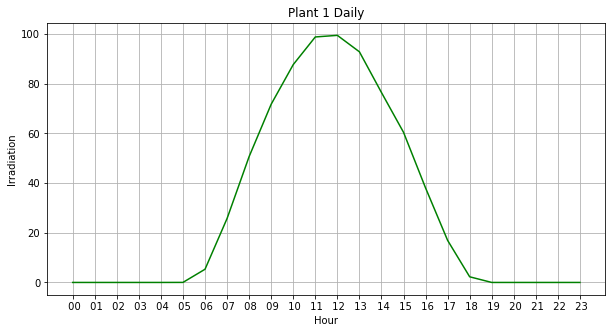

Figure 5: Plant 1 Irradiation in a 24 hour Period
The Total Average Irradiation in Plant 1  by day is 726.4914252689024 Watts/Squared Meters


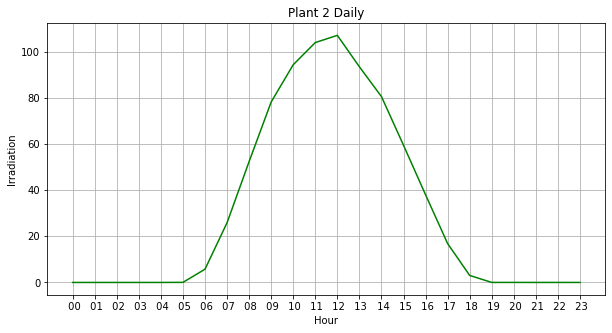

Figure 6: Plant 2 Irradiation in a 24 hour Period
The Total Average Irradiation in Plant 2  by day is 758.4898169359285 Watts/Squared Meters
The Total Average Irradiation in Plant 1 and 2 by day is 1484.9812422048308 Watts/Squared Meters


In [15]:

WDP1['Hour'] =WDP1["DATE_TIME"].str[10:13]
WDx = [Hour for Hour, WDP1 in WDP1.groupby('Hour')]
StatHourWDP1 = WDP1.groupby('Hour').sum()
WDy1 = StatHourWDP1['IRRADIATION']
plt.figure(figsize=(10,5))
plt.plot(WDx,WDy1,'g')
plt.xlabel("Hour")
plt.ylabel('Irradiation')
plt.title('Plant 1 Daily')
plt.xticks(WDx)
plt.grid()
plt.show()
print('Figure 5: Plant 1 Irradiation in a 24 hour Period')
print("The Total Average Irradiation in Plant 1  by day is " + str(StatHourWDP1["IRRADIATION"].sum()) + " Watts/Squared Meters")


WDP2['Hour'] =WDP2["DATE_TIME"].str[10:13]
WDx2 = [Hour for Hour, WDP2 in WDP2.groupby('Hour')]
StatHourWDP2 = WDP2.groupby('Hour').sum()
WDy2 = StatHourWDP2['IRRADIATION']
plt.figure(figsize=(10,5))
plt.plot(WDx2,WDy2,'g')
plt.xlabel("Hour")
plt.ylabel('Irradiation')
plt.title('Plant 2 Daily')
plt.xticks(WDx2)
plt.grid()
plt.show()
print('Figure 6: Plant 2 Irradiation in a 24 hour Period')
print("The Total Average Irradiation in Plant 2  by day is " + str(StatHourWDP2["IRRADIATION"].sum()) + " Watts/Squared Meters")

Total = StatHourWDP1["IRRADIATION"].sum() + StatHourWDP2["IRRADIATION"].sum()
print("The Total Average Irradiation in Plant 1 and 2 by day is " + str(Total) + " Watts/Squared Meters")

### The Total Average Irradiation in Plant 1  by day is 726.49 Watts/Squared Meters
### The Total Average Irradiation in Plant 2  by day is 758.48 Watts/Squared Meters
### The Total Average Irradiation in Plant 1 and 2 by day is 1484.98 Watts/Squared Meters

### Question: 7 What is the max ambient and module temperature?

In [16]:
WDP1.describe()
#Max Ambient Temp = 35.25C 
#Max Mod Temp = 65.54 C

,PLANT_ID,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
count,3182.0,3182.000000,3182.000000,3182.000000
mean,4135001.0,25.531606,31.091015,0.228313
std,0.0,3.354856,12.261222,0.300836
min,4135001.0,20.398505,18.140415,0.000000
25%,4135001.0,22.705182,21.090553,0.000000
50%,4135001.0,24.613814,24.618060,0.024653
75%,4135001.0,27.920532,41.307840,0.449588
max,4135001.0,35.252486,65.545714,1.221652


### Plant 1
### Max Ambient Temp = 35.25C 
### Max Mod Temp = 65.54 C

In [17]:
WDP2.describe()
#Max Ambient Temp = 39.18C 
#Max Mod Temp = 66.63C

,PLANT_ID,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
count,3259.0,3259.000000,3259.000000,3259.000000
mean,4136001.0,28.069400,32.772408,0.232737
std,0.0,4.061556,11.344034,0.312693
min,4136001.0,20.942385,20.265123,0.000000
25%,4136001.0,24.602135,23.716881,0.000000
50%,4136001.0,26.981263,27.534606,0.019040
75%,4136001.0,31.056757,40.480653,0.438717
max,4136001.0,39.181638,66.635953,1.098766


### Plant 2
### Max Ambient Temp = 39.18C 
### Max Mod Temp = 66.63C

### Question 8: Can we identify the need for panel cleaning/maintenance?
##### Based on the previous visualizations, it seems that plant 1 DC power is not being fully converted to AC Power as seen in Figures 1, 3 and 5 as compared to Plant 2 Figures 2,4, 6 where the AC and DC lines are very close to eachother showing very close conversion of DC to AC power. Lets calculate efficiencies for quantiative comparison between plants.

In [18]:
# Calculate Efficiency of Inverters
#https://www.e-education.psu.edu/eme812/node/738#:~:text=See%20if%20you%20can%20estimate,%25%20power%20%CE%B7%3D95%25.
# n = Power(AC)/Power(DC) 
P1['Eff'] = P1["AC_POWER"]/P1["DC_POWER"]
P2['Eff2'] = P2["AC_POWER"]/P2["DC_POWER"]
print(P1['Eff'].describe())
print(P2['Eff2'].describe())


count    36827.000000
mean         0.097719
std          0.000458
min          0.095552
25%          0.097579
50%          0.097845
75%          0.098014
max          0.106592
Name: Eff, dtype: float64
count    32036.000000
mean         0.976806
std          0.005020
min          0.912790
25%          0.975014
50%          0.978432
75%          0.980247
max          1.008320
Name: Eff2, dtype: float64


### Based on efficency Calculation above, Plant 1's max efficiency is only 10% meaning that only 10% of the DC power obtained from the sun is being transfered to AC power. 

### However, if we assume that there is a problem with the sensor collecting Plant 1's DC_Power data, upon looking at the data, seems like the DC Power of Plant 1 is off by a factor of 10. Lets see how the efficiency changes after this fix.  

In [19]:
P1['DC_POWER'] = P1['DC_POWER']/10
print(P1['DC_POWER'].describe())
P1['Eff'] = P1["AC_POWER"]/P1["DC_POWER"]
P1.describe()

count    68778.000000
mean       314.742621
std        403.645717
min          0.000000
25%          0.000000
50%         42.900000
75%        636.696429
max       1447.112500
Name: DC_POWER, dtype: float64


,PLANT_ID,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,Eff
count,68778.0,68778.000000,68778.000000,68778.000000,6.877800e+04,36827.000000
mean,4135001.0,314.742621,307.802752,3295.968737,6.978712e+06,0.977189
std,0.0,403.645717,394.396439,3145.178309,4.162720e+05,0.004583
min,4135001.0,0.000000,0.000000,0.000000,6.183645e+06,0.955518
25%,4135001.0,0.000000,0.000000,0.000000,6.512003e+06,0.975790
50%,4135001.0,42.900000,41.493750,2658.714286,7.146685e+06,0.978451
75%,4135001.0,636.696429,623.618750,6274.000000,7.268706e+06,0.980144
max,4135001.0,1447.112500,1410.950000,9163.000000,7.846821e+06,1.065922


### From this Fix we can see that the average effiencies of both plants operate around 97% and the 3% can be attributted to the powering of the inverters and heat. 

### However, if found that the sensors are working correctly there must be some issue in plant 1 as the conversion of DC to AC is not effiecient whatsoever. Maintenence of the Inverters are needed, and some Monitoring process should be in place to ensure the efficieny does not drop lower than a certain treshold i.e 95%

### If this was indeed a scaling issue, the answers above for the DC_Power Values would be divided by a value of 10 

### Which inverter had the best efficiency in the both plants?

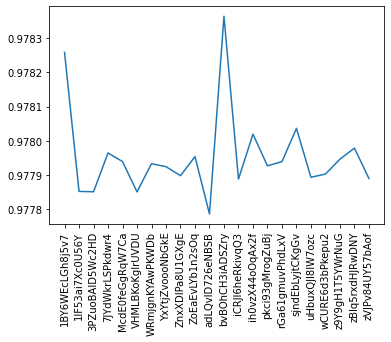

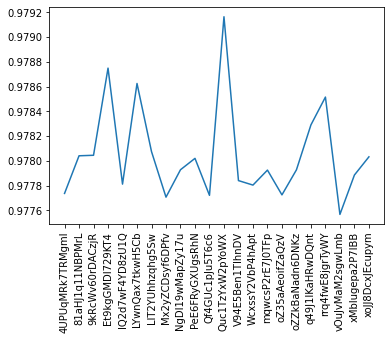

In [20]:
INP1 = np.unique(P1['SOURCE_KEY'])
INP2 = np.unique(P2['SOURCE_KEY'])
INP1_Total= P1.groupby('SOURCE_KEY').sum()
INP2_Total= P2.groupby('SOURCE_KEY').sum()
INP1_Total['EFFByM1'] = INP1_Total['AC_POWER']/INP1_Total['DC_POWER']
plt.plot(INP1,INP1_Total['EFFByM1'])
plt.xticks(rotation=90)
plt.show()

INP1 = np.unique(P1['SOURCE_KEY'])
INP2 = np.unique(P2['SOURCE_KEY'])
INP1_Total= P1.groupby('SOURCE_KEY').sum()
INP2_Total= P2.groupby('SOURCE_KEY').sum()
INP2_Total['EFFByM1'] = INP2_Total['AC_POWER']/INP2_Total['DC_POWER']
plt.plot(INP2,INP2_Total['EFFByM1'])
plt.xticks(rotation=90)
plt.show()

### Plant 1 : bvBOhCH3iADSZry
### Plant 2 : Quc1TzYxW2pYoWX